##### Oevrsampling
##### Undersampling
##### SMOTE

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [13]:
df = pd.read_csv("Churn.csv")
df

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
df.head(10)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
8,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
9,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [15]:
df.tail(10)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
7034,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7036,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7037,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7043,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [16]:
df.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [17]:
df.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [19]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3489
Name: count, dtype: int64

In [20]:
#Having Partner
df[df['Partner'] == 'Yes']

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
9,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
11,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
13,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [21]:
#Does not have partner
df[df['Partner'] == 'No']

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7036,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7037,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


In [22]:
#Male and Married
df[((df['Gender'] == 'Male')&(df['Partner'] == 'Yes'))]

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
11,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
13,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
22,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
25,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.3,No
27,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7025,7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No
7032,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [23]:
#Female not Married
df[((df['Gender'] == 'Female')&(df['Partner'] == 'No'))]

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
17,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
20,4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7035,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No


In [24]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
print(df['Churn'])

0       0
1       0
2       0
3       1
4       0
       ..
7039    0
7040    0
7041    0
7042    1
7043    0
Name: Churn, Length: 7044, dtype: int32


In [25]:
df['Churn'].value_counts()

Churn
0    5175
1    1869
Name: count, dtype: int64

Churn
0    5175
1    1869
Name: count, dtype: int64


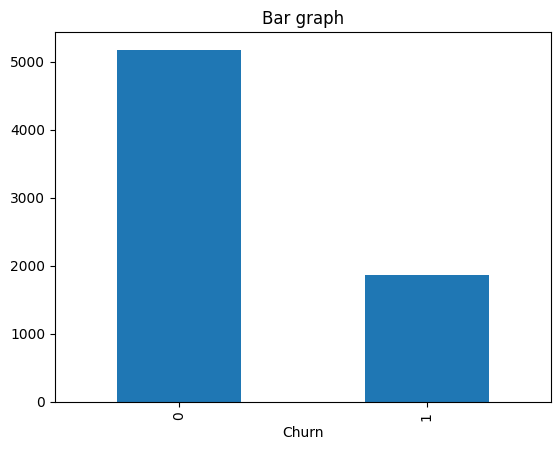

In [26]:
trans = df['Churn'].value_counts()
print(trans)
trans.plot.bar()
plt.title('Bar graph')
plt.xlabel("Churn")
plt.show()

### Undersampling

In [84]:
#class count
count_class_0,count_class_1 = df.Churn.value_counts()
print(count_class_0)
print(count_class_1)

5175
1869


In [85]:
#Divide by class
x = df[df['Churn'] == 0]
print(x)

y = df[df['Churn'] == 1]
print(y)

      Customer ID  Gender  Senior Citizen  Partner  Dependents  tenure  \
0            5375       0               0        1           0       1   
1            5376       0               0        1           0       1   
2            3962       1               0        0           0      34   
4            5536       1               0        0           0      45   
7            1002       1               0        0           1      22   
...           ...     ...             ...      ...         ...     ...   
7038         1758       0               0        0           0      72   
7039         4853       1               0        1           1      24   
7040         1525       0               0        1           1      72   
7041         3367       0               0        1           1      11   
7043         2226       1               0        0           0      66   

      Phone Service  Multiple Lines  Internet Service  Online Security  ...  \
0                 0             

In [86]:
df_class_0 = df[df['Churn'] == 0]
print(df_class_0)

      Customer ID  Gender  Senior Citizen  Partner  Dependents  tenure  \
0            5375       0               0        1           0       1   
1            5376       0               0        1           0       1   
2            3962       1               0        0           0      34   
4            5536       1               0        0           0      45   
7            1002       1               0        0           1      22   
...           ...     ...             ...      ...         ...     ...   
7038         1758       0               0        0           0      72   
7039         4853       1               0        1           1      24   
7040         1525       0               0        1           1      72   
7041         3367       0               0        1           1      11   
7043         2226       1               0        0           0      66   

      Phone Service  Multiple Lines  Internet Service  Online Security  ...  \
0                 0             

In [87]:
df_class_1 = df[df['Churn'] == 1]
print(df_class_1)

      Customer ID  Gender  Senior Citizen  Partner  Dependents  tenure  \
3            2564       1               0        0           0       2   
5            6512       0               0        0           0       2   
6            6552       0               0        0           0       8   
9            5605       0               0        1           0      28   
14            174       1               0        0           0      49   
...           ...     ...             ...      ...         ...     ...   
7022         1155       1               0        0           0      12   
7027         6202       0               0        0           0       9   
7033         4893       1               1        0           0       1   
7035          437       0               0        0           0      67   
7042         5935       1               1        1           0       4   

      Phone Service  Multiple Lines  Internet Service  Online Security  ...  \
3                 1             

In [88]:
df_class_0.shape

(5175, 21)

In [89]:
df_class_1.shape

(1869, 21)

In [90]:
#Undersample 0-class and concat the DataFrame of both class
a = df_class_0.sample(count_class_1)
df_test_under = pd.concat([a, df_class_1],axis = 0)

print("Random under-sampling:")
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


### Over sampling

In [79]:
#Oversample 1-class and concat the DataFrame of both classes
df_class_1_over = df_class_1.sample(count_class_0,replace = True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)

print("Random over-sampling:")
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5175
1    5175
Name: count, dtype: int64


### SMOTE
##### Synthetic Minority Over-Sampling Technique
##### Creating synthetic instance

In [80]:
#Customer ID
le = LabelEncoder() 
df['Customer ID'] = le.fit_transform(df['Customer ID'])     
print(df['Customer ID']) 

#Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print(df['Gender'])

#Partner
le = LabelEncoder()
df['Partner'] = le.fit_transform(df['Partner'])
print(df['Partner'])

#Dependents	
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])
print(df['Dependents'])

#Phone Service
le = LabelEncoder()
df['Phone Service'] = le.fit_transform(df['Phone Service'])
print(df['Phone Service'])

le = LabelEncoder()
df['Multiple Lines'] = le.fit_transform(df['Multiple Lines'])
print(df['Multiple Lines'])


le = LabelEncoder()
df['Internet Service'] = le.fit_transform(df['Internet Service'])
print(df['Internet Service']) 

le = LabelEncoder()
df['Online Security'] = le.fit_transform(df['Online Security'])
print(df['Online Security'])

le = LabelEncoder()
df['Online Backup'] = le.fit_transform(df['Online Backup'])
print(df['Online Backup'])

le = LabelEncoder()
df['Device Protection'] = le.fit_transform(df['Device Protection'])
print(df['Device Protection'])

le = LabelEncoder()
df['Tech Support'] = le.fit_transform(df['Tech Support'])
print(df['Tech Support'])

le = LabelEncoder()
df['Streaming TV'] = le.fit_transform(df['Streaming TV'])
print(df['Streaming TV'])

le = LabelEncoder()
df['Streaming Movies'] = le.fit_transform(df['Streaming Movies'])
print(df['Streaming Movies'])

le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])
print(df['Contract'])

le = LabelEncoder()
df['Paperless Billing'] = le.fit_transform(df['Paperless Billing'])
print(df['Paperless Billing'])

le = LabelEncoder()
df['Payment Method'] = le.fit_transform(df['Payment Method'])
print(df['Payment Method'])

le = LabelEncoder()
df['Total Charges'] = le.fit_transform(df['Total Charges'])
print(df['Total Charges'])

0       5375
1       5376
2       3962
3       2564
4       5536
        ... 
7039    4853
7040    1525
7041    3367
7042    5935
7043    2226
Name: Customer ID, Length: 7044, dtype: int64
0       0
1       0
2       1
3       1
4       1
       ..
7039    1
7040    0
7041    0
7042    1
7043    1
Name: Gender, Length: 7044, dtype: int64
0       1
1       1
2       0
3       0
4       0
       ..
7039    1
7040    1
7041    1
7042    1
7043    0
Name: Partner, Length: 7044, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
7039    1
7040    1
7041    1
7042    0
7043    0
Name: Dependents, Length: 7044, dtype: int64
0       0
1       0
2       1
3       1
4       0
       ..
7039    1
7040    1
7041    0
7042    1
7043    1
Name: Phone Service, Length: 7044, dtype: int64
0       1
1       1
2       0
3       0
4       1
       ..
7039    2
7040    2
7041    1
7042    2
7043    0
Name: Multiple Lines, Length: 7044, dtype: int64
0       0
1       0
2       0
3     

In [81]:
X = df.drop('Churn',axis = 1)

In [82]:
y = df['Churn']

In [83]:
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy = 'auto',random_state = 42)

#Apply SMOTE to resample the dataset
X_resampled,y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()

Churn
0    5175
1    5175
Name: count, dtype: int64

In [11]:
#reshape error:
#x1 = x.reshape(-1,1)
#y = y.reshape(-1,1)

In [51]:
# X = df_test_under.drop('Churn',axis = 'columns')
# y = df_test_under['Churn']

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = )